In [1]:
!git clone https://github.com/pallavikailas/crop-disease.git

Cloning into 'crop-disease'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 258 (delta 53), reused 6 (delta 6), pack-reused 174 (from 1)
Receiving objects: 100% (258/258), 6.38 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [2]:
%cd crop-disease

/content/crop-disease


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.6 MB/s eta 0:00:00


In [12]:
import pandas as pd

# Load the CSV file
file_path = "/content/crop-disease/data/crop_disease.csv"  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Display unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Crop Type': ['Wheat' 'Corn' 'Rice' 'Sorghum' 'Barley' 'Oat' 'Lentil' 'Sugarcane'
 'Soybean' 'Sunflower' 'Cotton' 'Peanut' 'Tomato' 'Millet' 'Cassava']
Unique values in 'Season': ['Summer' 'Spring' 'Winter' 'Autumn']
Unique values in 'Temperature (°C)': [13.71       33.86       24.57       ... 25.50723055 21.63920468
 24.6845014 ]
Unique values in 'Humidity (%)': [41.57       95.11       74.1        ... 75.13768072 40.67125028
 95.89062967]
Unique values in 'Precipitation (mm)': [24.94        8.34        6.88       ...  9.99299267  6.48496832
 42.31025517]
Unique values in 'Soil Moisture (%)': [30.05       25.76       24.14       ... 34.7850006  16.76217435
 10.17256207]
Unique values in 'Wind Speed (km/h)': [15.89        6.55       16.44       ...  6.03274829 23.63796529
  5.7205827 ]
Unique values in 'Sunlight (hours)': [ 8.92        7.09       10.77       ...  8.4789985  10.3088491
  5.72424046]
Unique values in 'Disease Name': ['Fusarium Head Blight' 'Gray Leaf Spo

In [4]:
from src.dataloader import load_and_preprocess_data

# Load and preprocess data
X, y = load_and_preprocess_data("data/crop_disease.csv")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
%cd src

/content/crop-disease/src


In [7]:
from training import train_ensemble_model, save_model

ensemble_model, label_encoder = train_ensemble_model(X_train, y_train)
save_model(ensemble_model, label_encoder)

F1 Score for Random Forest: 0.1664
F1 Score for SVM: 0.1286
F1 Score for KNN: 0.1458
F1 Score for XGBoost: 0.1690
F1 Score for Logistic Regression: 0.1421
Model and label encoder saved to models/ensemble_model.pkl


In [8]:
from evaluation import evaluate_model

evaluation_metrics = evaluate_model(ensemble_model, X_test, y_test)

print("Model Evaluation Metrics:")
print(f"Accuracy: {evaluation_metrics['Accuracy']:.2f}")
print(f"Precision: {evaluation_metrics['Precision']:.2f}")
print(f"Recall: {evaluation_metrics['Recall']:.2f}")
print(f"F1 Score: {evaluation_metrics['F1 Score']:.2f}")

Model Evaluation Metrics:
Accuracy: 0.18
Precision: 0.18
Recall: 0.18
F1 Score: 0.18


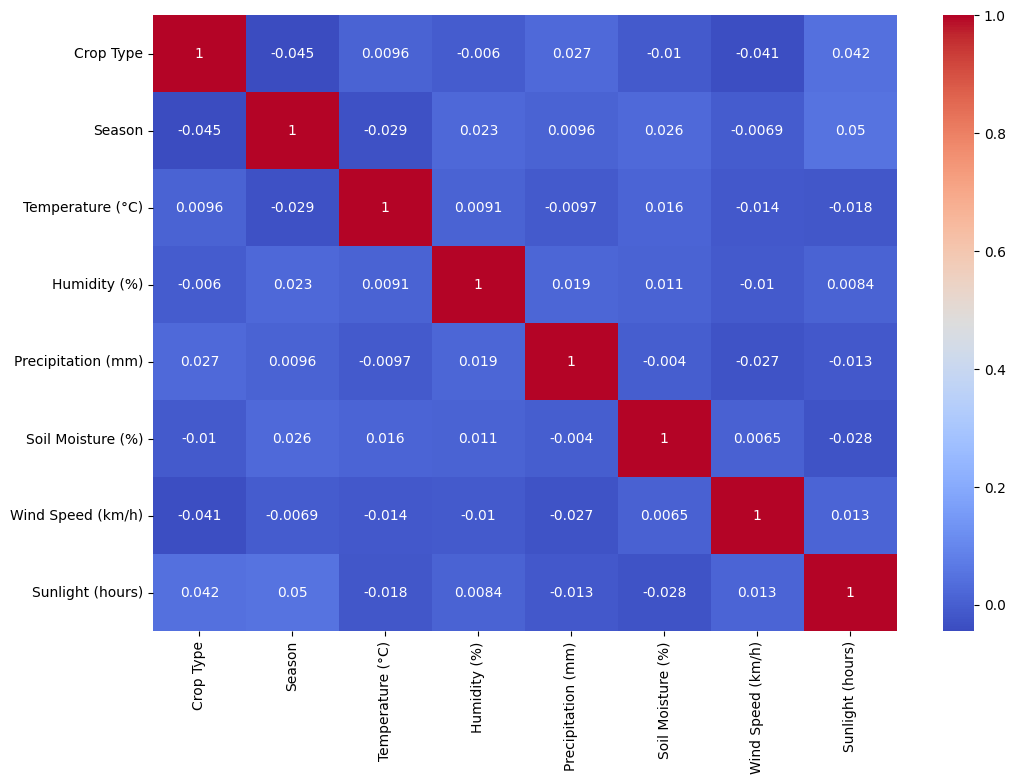

In [9]:
from visualisation import plot_correlation_matrix, plot_scatter

plot_correlation_matrix(X)